# Assignment 5

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading the consoles.csv file

In [2]:
df_consoles = pd.read_csv('consoles.csv')
df_consoles = df_consoles.sort_values(by=['Company', 'Units sold']).reset_index(drop=True)
df_consoles

,Platform,Type,Company,Released,Units sold
0,Xbox Series X/S,Home,Microsoft,2020,21000000
1,Xbox,Home,Microsoft,2001,24000000
2,Xbox One,Home,Microsoft,2013,58000000
3,Xbox 360,Home,Microsoft,2005,84000000
4,Color TV-Game,Dedicated,Nintendo,1977,3000000
5,NES Classic Edition,Dedicated,Nintendo,2016,3560000
6,Famicom Disk System,Home console add-on,Nintendo,1986,4500000
7,Super NES Classic Edition,Dedicated,Nintendo,2017,5280000
8,Wii U,Home,Nintendo,2012,13560000
9,GameCube,Home,Nintendo,2001,21740000


### Getting the color codes for each of the company type

In [3]:
outer_colors = ['#5599cc', '#ea6727', '#83c143']
df_consoles.loc[df_consoles['Company']=='Microsoft', 'Color'] = outer_colors[0]
df_consoles.loc[df_consoles['Company']=='Nintendo', 'Color'] = outer_colors[1]
df_consoles.loc[df_consoles['Company']=='Sony', 'Color'] = outer_colors[2]
df_consoles


df_consoles

,Platform,Type,Company,Released,Units sold,Color
0,Xbox Series X/S,Home,Microsoft,2020,21000000,#5599cc
1,Xbox,Home,Microsoft,2001,24000000,#5599cc
2,Xbox One,Home,Microsoft,2013,58000000,#5599cc
3,Xbox 360,Home,Microsoft,2005,84000000,#5599cc
4,Color TV-Game,Dedicated,Nintendo,1977,3000000,#ea6727
5,NES Classic Edition,Dedicated,Nintendo,2016,3560000,#ea6727
6,Famicom Disk System,Home console add-on,Nintendo,1986,4500000,#ea6727
7,Super NES Classic Edition,Dedicated,Nintendo,2017,5280000,#ea6727
8,Wii U,Home,Nintendo,2012,13560000,#ea6727
9,GameCube,Home,Nintendo,2001,21740000,#ea6727


### Deleting the names of the least units sold to prevent the clutter

In [4]:
df_consoles.iloc[4:8, 0] = ''
df_consoles

,Platform,Type,Company,Released,Units sold,Color
0,Xbox Series X/S,Home,Microsoft,2020,21000000,#5599cc
1,Xbox,Home,Microsoft,2001,24000000,#5599cc
2,Xbox One,Home,Microsoft,2013,58000000,#5599cc
3,Xbox 360,Home,Microsoft,2005,84000000,#5599cc
4,,Dedicated,Nintendo,1977,3000000,#ea6727
5,,Dedicated,Nintendo,2016,3560000,#ea6727
6,,Home console add-on,Nintendo,1986,4500000,#ea6727
7,,Dedicated,Nintendo,2017,5280000,#ea6727
8,Wii U,Home,Nintendo,2012,13560000,#ea6727
9,GameCube,Home,Nintendo,2001,21740000,#ea6727


### Grouping for the inner circle

In [5]:
df_company = df_consoles.groupby('Company').sum().reset_index()
df_company

,Company,Platform,Type,Released,Units sold,Color
0,Microsoft,Xbox Series X/SXboxXbox OneXbox 360,HomeHomeHomeHome,8039,187000000,#5599cc#5599cc#5599cc#5599cc
1,Nintendo,Wii UGameCubeNintendo 64Game & WatchSNES/Super...,DedicatedDedicatedHome console add-onDedicated...,31986,903230000,#ea6727#ea6727#ea6727#ea6727#ea6727#ea6727#ea6...
2,Sony,PlayStation VitaPlayStation 5PlayStation Porta...,HandheldHomeHandheldHomeHomeHomeHome,14048,609090000,#83c143#83c143#83c143#83c143#83c143#83c143#83c143


## Answer 2

- I used two pie charts, the radius of the outer pie chart is less thus made it a donut shape. The inner space is taken by the inner pie chart

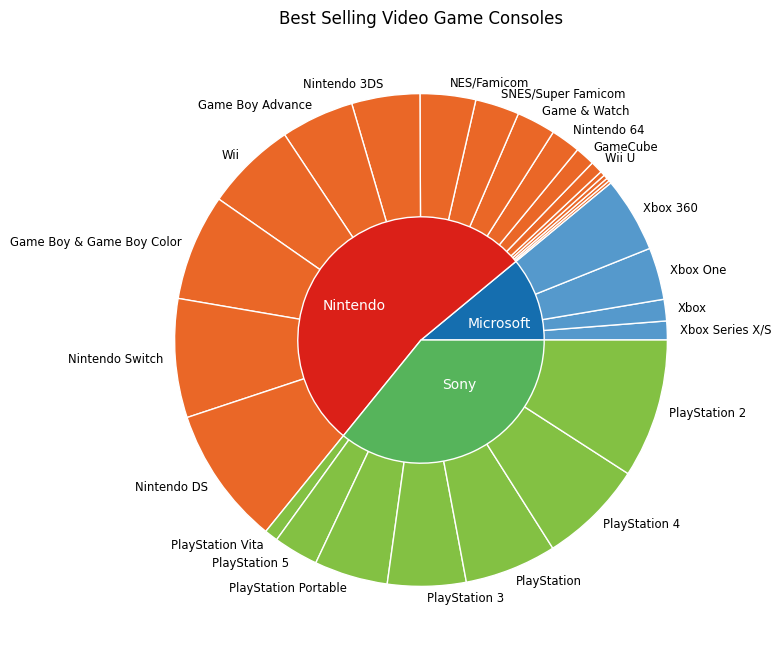

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))

inner_color = ['#156eaf', '#db2018', '#56b45b']

ax.pie(df_consoles['Units sold'], labels=df_consoles['Platform'],labeldistance=1.05, colors= df_consoles['Color'], wedgeprops=dict(edgecolor='w'), textprops=dict(fontsize='small'))
ax.pie(df_company['Units sold'], labels=df_company['Company'],labeldistance=0.4, radius=0.5, colors=inner_color, wedgeprops=dict(edgecolor='w'), textprops=dict(color='w'))

ax.set_title("Best Selling Video Game Consoles")
plt.show()



## Attributions

- Nested Pie Charts - https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html
- Styling Pie Chart - https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
- Text Properties - https://matplotlib.org/stable/users/explain/text/text_props.html
- Axes Pie - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
- Wedge - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Wedge.html#matplotlib.patches.Wedge